<a href="https://colab.research.google.com/github/valenderval/MLA_JFV/blob/main/FinalProject_Regression_JFV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Final Project - Regression
Jacob Vallery <br>CS430-ON <br>Machine Learning in the Cloud

#Standard Imports

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [75]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Imports for specific models

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
from sklearn.model_selection import GridSearchCV

#Imports for Splitting Data and Building Pipeline

In [77]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

#Imports for Performance Measures

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

#Confusion Matrix Function

In [79]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

#ROC_Curve Function

In [80]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

#Regression

### Aquire Data -

Weather history for the area of Szeged, Hungary between 2006 and 2016.

In [81]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/weatherHistory.csv')

In [82]:
df.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


In [83]:
df.rename(columns={'Precip Type': 'precip_type'}, inplace=True)
df.rename(columns={'Temperature (C)': 'temp_c'}, inplace=True)
df.rename(columns={'Apparent Temperature (C)': 'apparent_temp_c'}, inplace=True)
df.rename(columns={'Humidity': 'humidity'}, inplace=True)
df.rename(columns={'Wind Speed (km/h)': 'wind_speed'}, inplace=True)
df.rename(columns={'Wind Bearing (degrees)': 'wind_bearing'}, inplace=True)
df.rename(columns={'Visibility (km)': 'visibility'}, inplace=True)
df.rename(columns={'Loud Cover': 'loud_cover'}, inplace=True)
df.rename(columns={'Pressure (millibars)': 'pressure_millibars'}, inplace=True)

In [84]:
df.head(2)

,Formatted Date,Summary,precip_type,temp_c,apparent_temp_c,humidity,wind_speed,wind_bearing,visibility,loud_cover,pressure_millibars,Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


#Statistical and Visual Exploration

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Formatted Date      96453 non-null  object 
 1   Summary             96453 non-null  object 
 2   precip_type         95936 non-null  object 
 3   temp_c              96453 non-null  float64
 4   apparent_temp_c     96453 non-null  float64
 5   humidity            96453 non-null  float64
 6   wind_speed          96453 non-null  float64
 7   wind_bearing        96453 non-null  float64
 8   visibility          96453 non-null  float64
 9   loud_cover          96453 non-null  float64
 10  pressure_millibars  96453 non-null  float64
 11  Daily Summary       96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [86]:
df.describe()

,temp_c,apparent_temp_c,humidity,wind_speed,wind_bearing,visibility,loud_cover,pressure_millibars
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [87]:
df['humidity'].value_counts()

,count
humidity,
0.93,5708
0.92,3888
0.96,3843
1.00,2890
0.89,2837
...,...
0.15,10
0.16,8
0.14,4


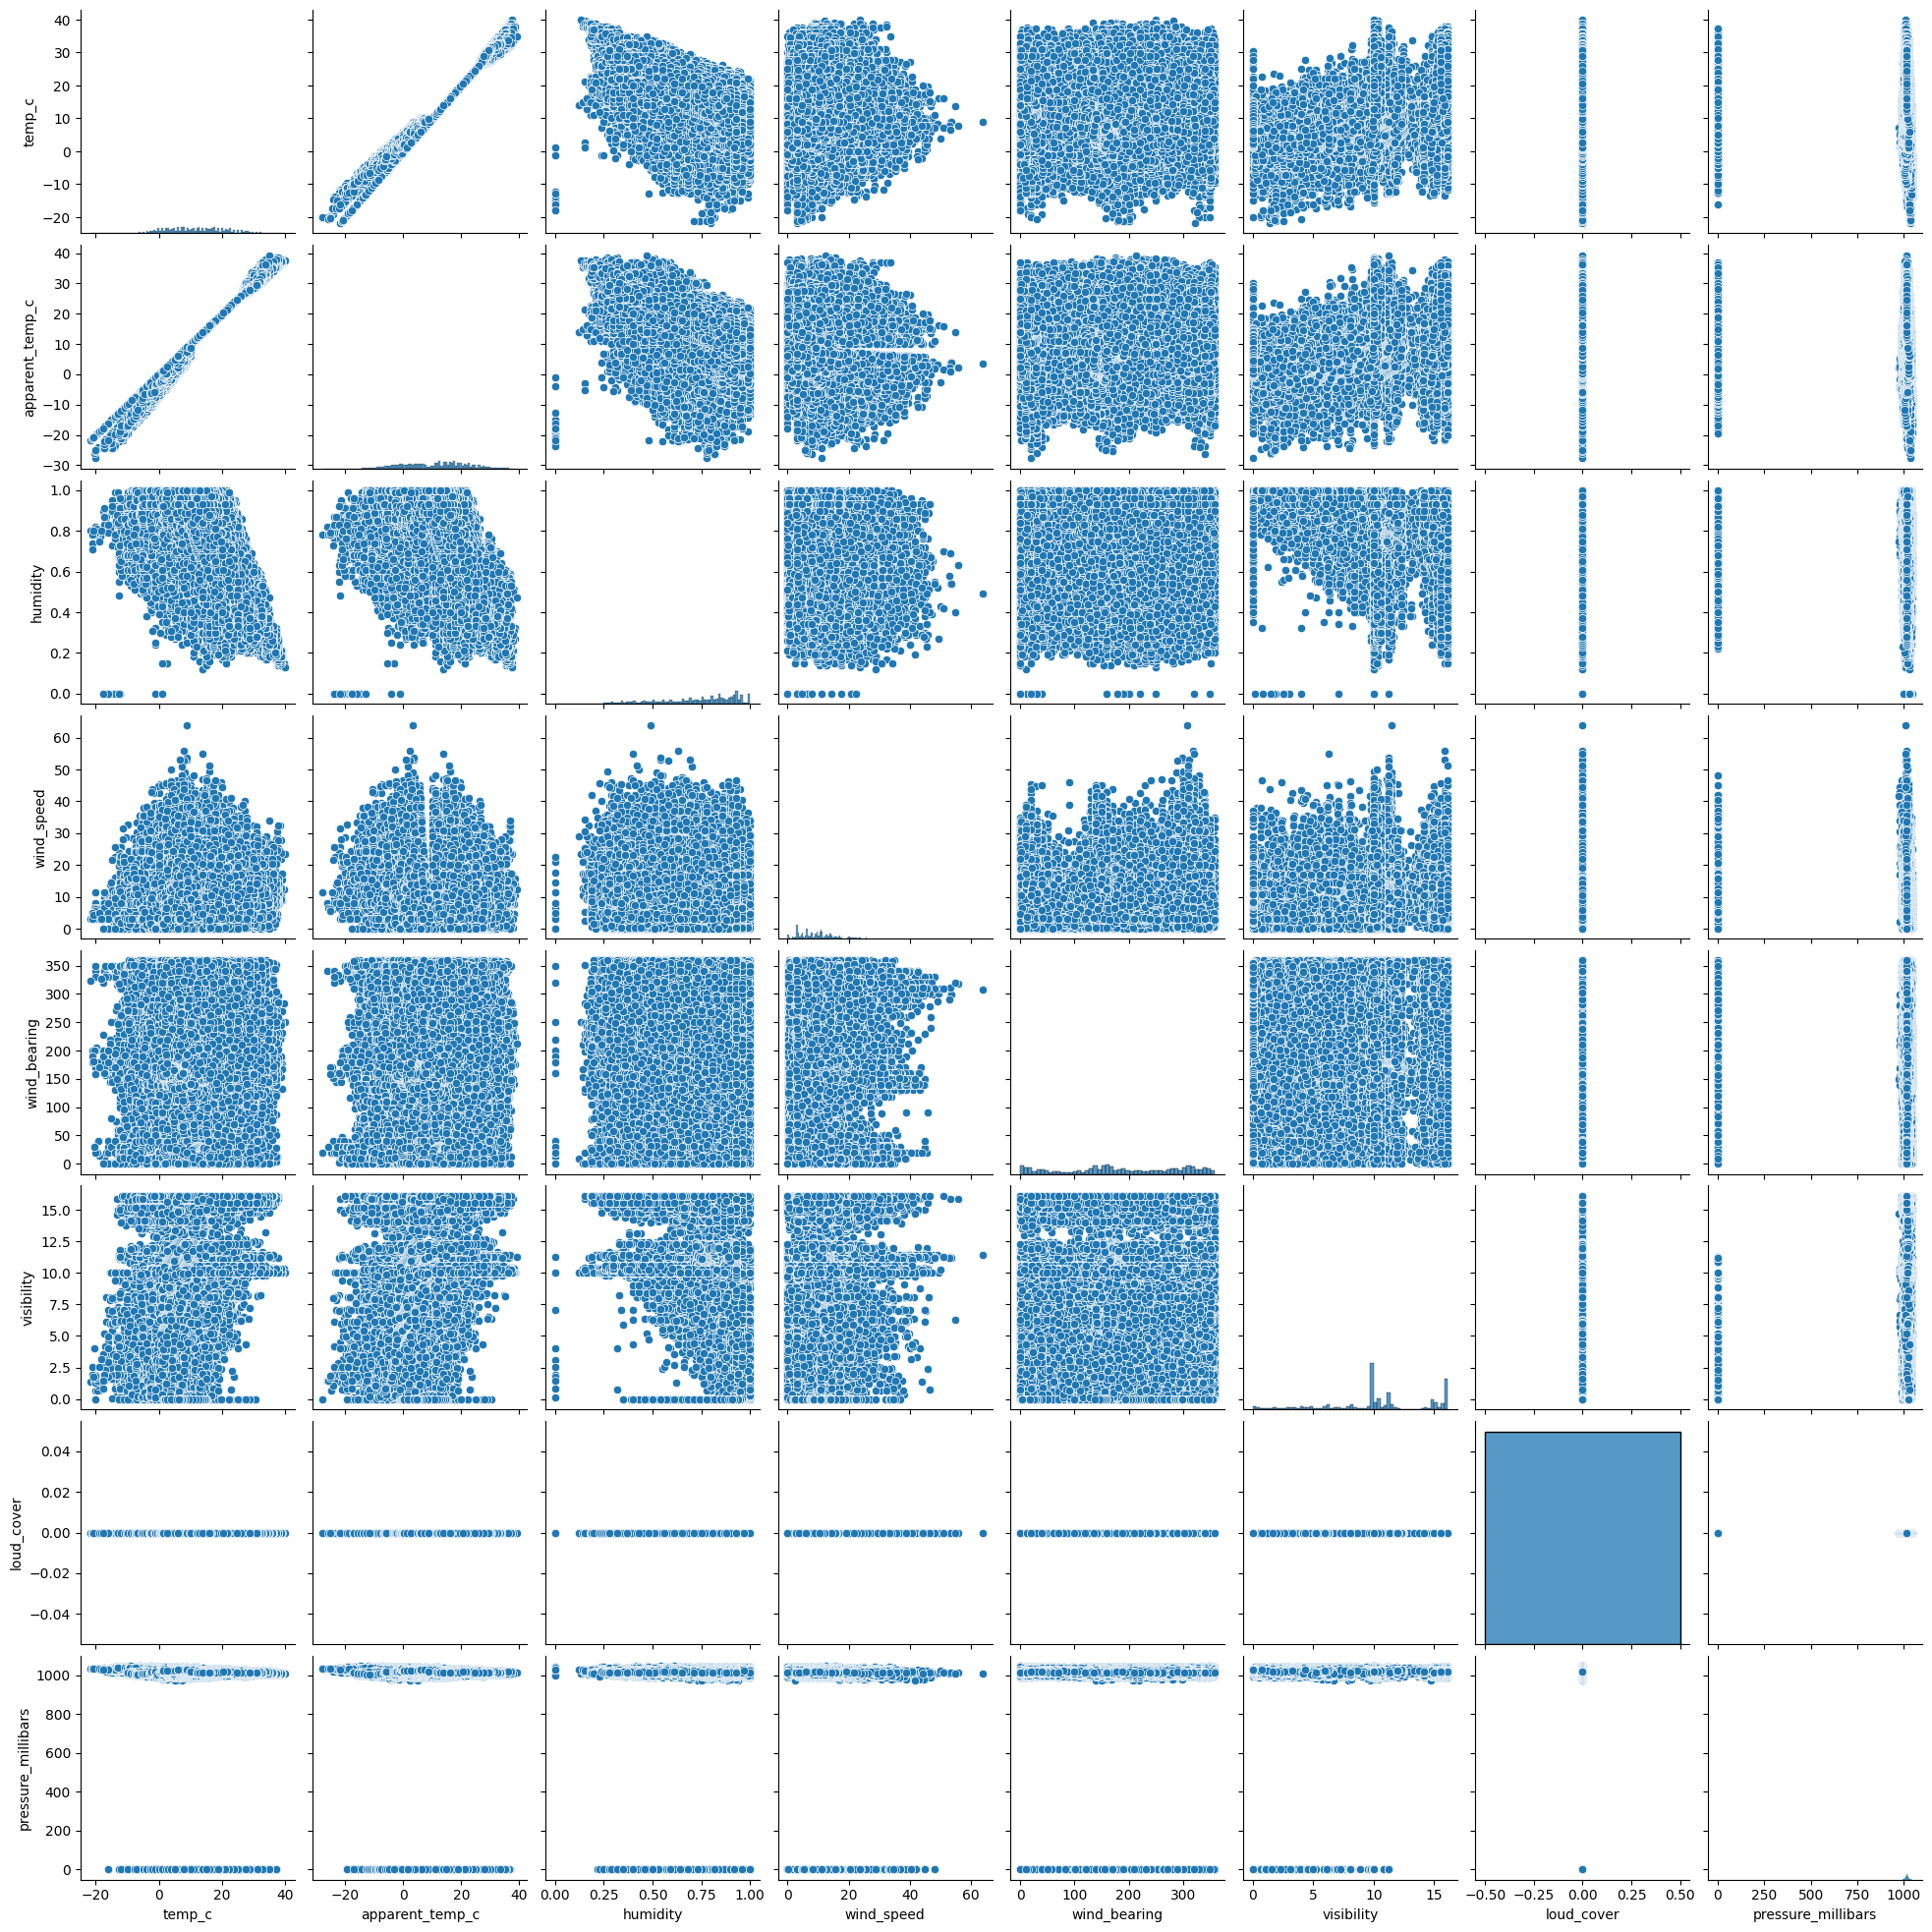

In [ ]:
sns.pairplot(df)
plt.show()

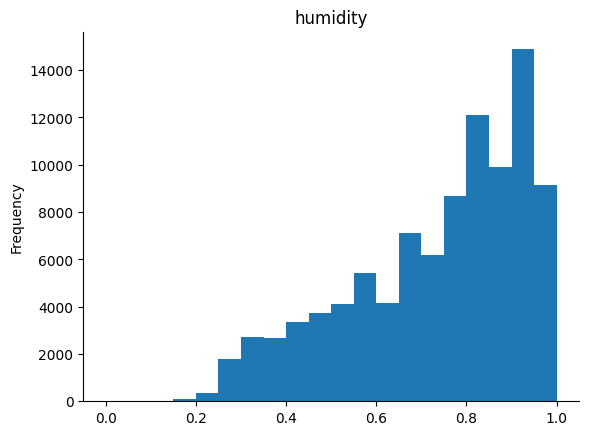

In [15]:
# @title humidity
from matplotlib import pyplot as plt
df['humidity'].plot(kind='hist', bins=20, title='humidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

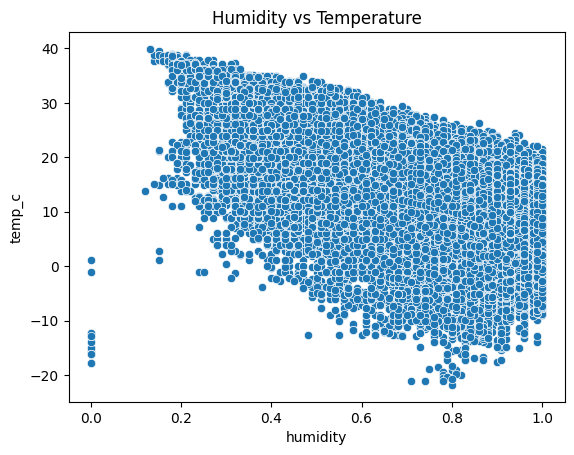

In [16]:
# @title Humidity vs. Temp
sns.scatterplot(x='humidity', y='temp_c', data=df)
plt.title('Humidity vs Temperature')
plt.show()

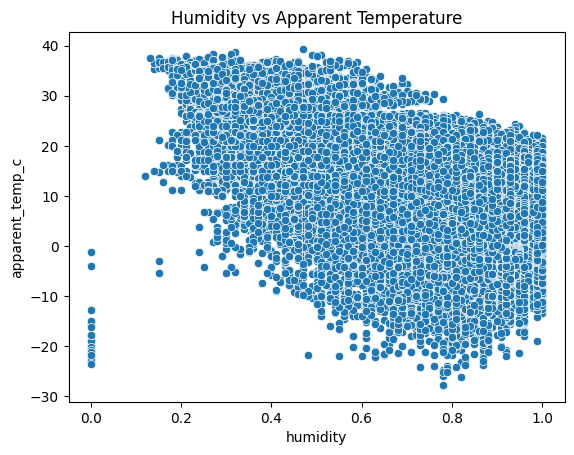

In [17]:
# @title Humidity vs Apparent Tempature
sns.scatterplot(x='humidity', y='apparent_temp_c', data=df)
plt.title('Humidity vs Apparent Temperature')
plt.show()

#Splitting Data into Train/Test

In [88]:
X = df.drop(columns=['humidity','Formatted Date','Summary','precip_type','Daily Summary'])
y = df['humidity']

In [89]:
X.head(2)

,temp_c,apparent_temp_c,wind_speed,wind_bearing,visibility,loud_cover,pressure_millibars
0,9.472222,7.388889,14.1197,251.0,15.8263,0.0,1015.13
1,9.355556,7.227778,14.2646,259.0,15.8263,0.0,1015.63


In [91]:
y.head(2)

,humidity
0,0.89
1,0.86


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=32)

#Building the Pipeline

In [93]:
num_attribs = ['temp_c','apparent_temp_c','wind_speed','wind_bearing','visibility','loud_cover','pressure_millibars']

In [94]:
col_transform = ColumnTransformer(transformers=[
                               ('num',MinMaxScaler(), num_attribs)],
                               remainder='passthrough')

###Linear Regression pipeline

In [95]:
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('mlr_model', LinearRegression()),
])

###Support Vector Machine pipelines

In [118]:
pipelineSVR = Pipeline([
                     ('trans', col_transform),
                     ('SVR', SVR(kernel="rbf", C=10, max_iter=10000, epsilon=0.1)),
                     ])

#Executing the Model

In [97]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['temp_c', 'apparent_temp_c',
                                                   'wind_speed', 'wind_bearing',
                                                   'visibility', 'loud_cover',
                                                   'pressure_millibars'])])),
                ('mlr_model', LinearRegression())])

In [119]:
pipelineSVR.fit(X_train, np.ravel(y_train))

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['temp_c', 'apparent_temp_c',
                                                   'wind_speed', 'wind_bearing',
                                                   'visibility', 'loud_cover',
                                                   'pressure_millibars'])])),
                ('SVR', SVR(C=10, max_iter=10000))])

#Evaluating Model

###Linear Regression Results

In [99]:
y_train_pred = pipeline.predict(X_train)

In [30]:
y_test_pred = pipeline.predict(X_test)

In [31]:
print(mean_squared_error(y_train, y_train_pred)**(0.5))
print(mean_squared_error(y_test, y_test_pred)**(0.5))

0.14201861193541512
0.14230128275315887


In [36]:
r2train = r2_score(y_train, y_train_pred)
r2 = r2_score(y_test, y_test_pred)
print(f"Test R-squared: {r2}")
print(f"Train R-squared: {r2train}")

Test R-squared: 0.4704750180043916
Train R-squared: 0.47202481531752916


###Support Vector predictions

In [120]:
y_test_pred_SVR = pipelineSVR.predict(X_test)

In [121]:
y_train_pred_SVR = pipelineSVR.predict(X_train)

In [122]:
print(mean_squared_error(y_train, y_train_pred_SVR)**(0.5))
print(mean_squared_error(y_test, y_test_pred_SVR)**(0.5))

0.3810382492877417
0.38093825286497646


In [123]:
r2trainSVR = r2_score(y_train, y_train_pred_SVR)
r2SVR = r2_score(y_test, y_test_pred_SVR)
print(f"Test R-squared: {r2SVR}")
print(f"Train R-squared: {r2trainSVR}")

Test R-squared: -2.794704789040092
Train R-squared: -2.8006697104282163


#Conclusion

In a Markdown comment, write a conclusion on how suitable you think this model is for predicting the land type.